In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

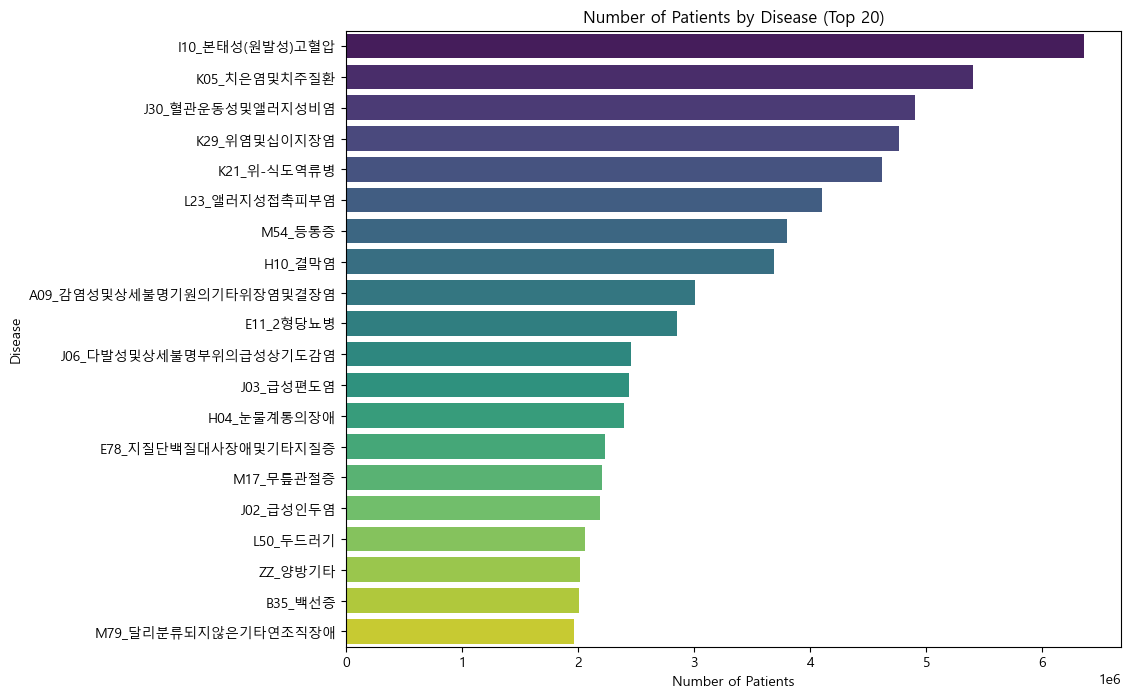

In [19]:

# Load the data
file_path = "./data/sungsam/질병소분류별_약국_처방조제_다빈도_상병_급여현황_계__20230718161947.csv"
data = pd.read_csv(file_path, encoding='cp949', header=1)


# Drop the first row
data = data.drop(0)

# Rename the columns
data.columns = ['Rank', 'Disease', 'Number_of_Patients', 'Days_of_Visit', 'Days_of_Payment', 'Treatment_Cost', 'Payment_Cost']

# Display the first few rows of the dataframe
data.head()

# Select the top 20 diseases
top_20_diseases = data.sort_values('Number_of_Patients', ascending=False).head(20)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Number_of_Patients', y='Disease', data=top_20_diseases, palette='viridis')
plt.title('Number of Patients by Disease (Top 20)')
plt.xlabel('Number of Patients')
plt.ylabel('Disease')
plt.show()

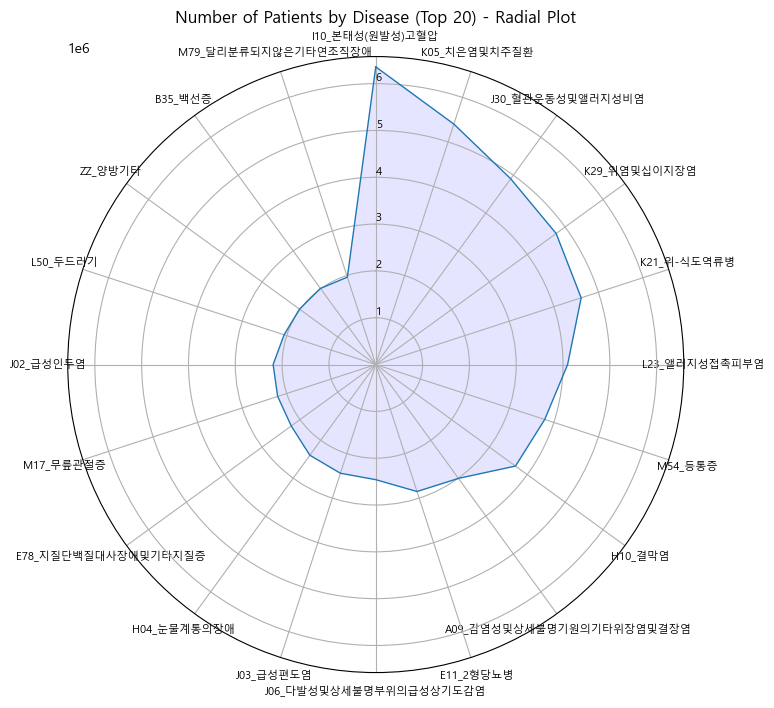

In [20]:
# Create a radial bar plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

x = range(0, len(top_20_diseases['Disease']))
y = top_20_diseases['Number_of_Patients'].values  # Convert to numpy array

# Set the angle of the plot
angles = [n / float(len(x)) * 2 * np.pi for n in range(len(x))]
angles += angles[:1]

# Ensure the plot is a complete circle
y = np.concatenate((y, [y[0]]))

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], top_20_diseases['Disease'], fontsize=8)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(fontsize=8)

plt.title('Number of Patients by Disease (Top 20) - Radial Plot')
ax.plot(angles, y, linewidth=1, linestyle='solid')
ax.fill(angles, y, 'b', alpha=0.1)

plt.show()


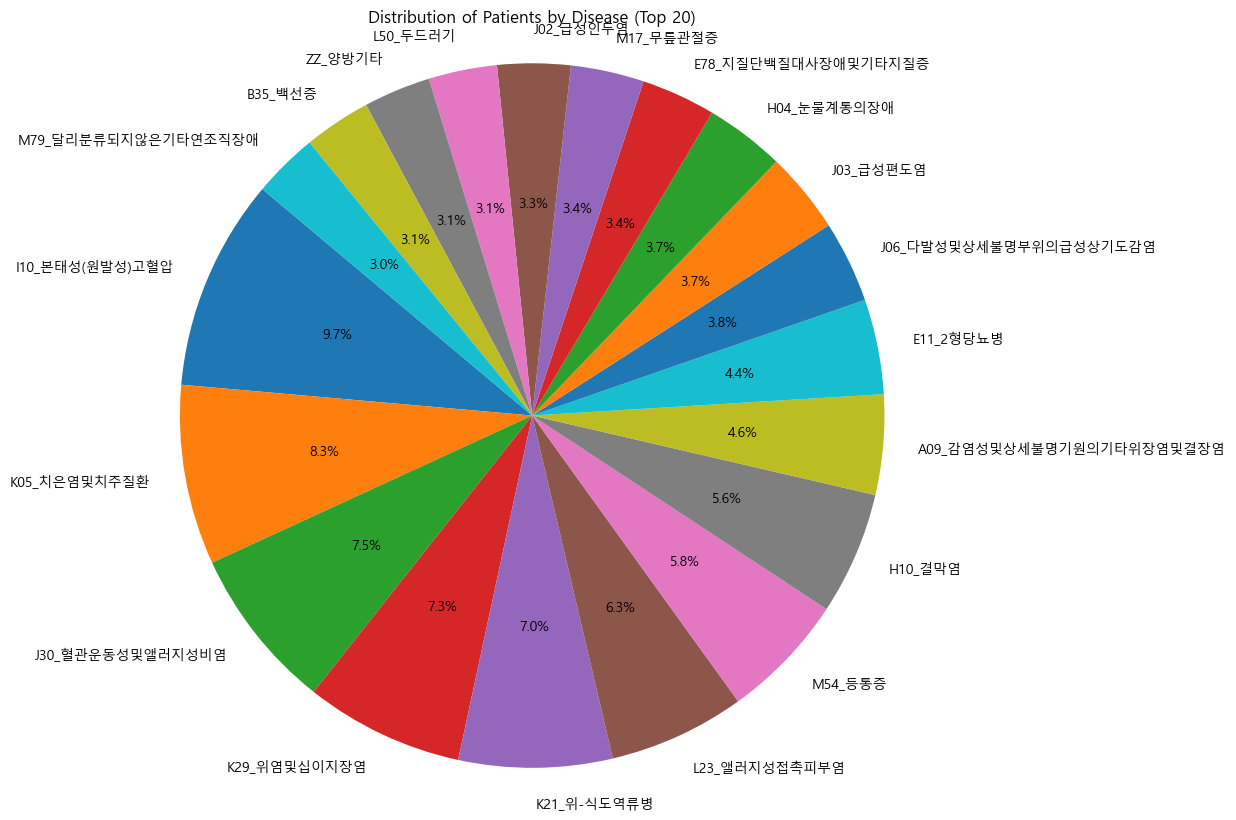

In [21]:
# Create a pie plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(top_20_diseases['Number_of_Patients'], labels=top_20_diseases['Disease'], autopct='%1.1f%%', startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Patients by Disease (Top 20)')
plt.show()